In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import datetime
%matplotlib inline

In [3]:
df = pd.read_csv('dataset_elecricity.csv',delimiter=',')
df.head()

,Country,Time,Balance,Product,Value,Unit
0,Australia,January 2023,Net Electricity Production,Electricity,22963.2021,GWh
1,Australia,January 2023,Net Electricity Production,Total Combustible Fuels,14190.6365,GWh
2,"Australia,January 2023,Net Electricity Product...",NaN,NaN,NaN,NaN,NaN
3,Australia,January 2023,Net Electricity Production,Oil and Petroleum Products,316.7434,GWh
4,Australia,January 2023,Net Electricity Production,Natural Gas,3382.4090,GWh


In [4]:
#df.loc[2,:]['Country']
lstnaa = df[df['Time'].isna()]['Country'].to_list()
lstnaa[:10]

['Australia,January 2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",10231.1342,GWh',
 'Australia,January 2023,Net Electricity Production,"Total Renewables (Geo, Solar, Wind, Other)",9032.9155,GWh',
 'Austria,January 2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",154.3662,GWh',
 'Austria,January 2023,Net Electricity Production,"Total Renewables (Geo, Solar, Wind, Other)",3894.0271,GWh',
 'Belgium,January 2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",226.7188,GWh',
 'Belgium,January 2023,Net Electricity Production,"Total Renewables (Geo, Solar, Wind, Other)",2504.5907,GWh',
 'Canada,January 2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",3087.1358,GWh',
 'Canada,January 2023,Net Electricity Production,"Total Renewables (Geo, Solar, Wind, Other)",44191.2942,GWh',
 'Chile,January 2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",1089.8822,GWh',
 'Chile,January 2023,Net Electricity Productio

In [5]:
# looking at the missing values
missing_products = set([x[x.find('"')+1:x[x.find('"')+1:].find('"')+x.find('"')+1] for x in lstnaa])
missing_products

{'Coal, Peat and Manufactured Gases',
 'Total Renewables (Geo, Solar, Wind, Other)'}

In [6]:
def resume_miss(row):
    spl_row = row['Country'].split(',')
    row['Product'] = [x for x in list(missing_products) if x in row['Country']][0]
    row['Country'] = spl_row[0]
    row['Time'] = spl_row[1]
    row['Balance'] = spl_row[2]
    row['Value'] = spl_row[-2]
    row['Unit'] = spl_row[-1]
    return row

In [7]:
df[df['Time'].isna()] = df[df['Time'].isna()].apply(resume_miss,axis=1)

In [9]:
df.head()

,Country,Time,Balance,Product,Value,Unit
0,Australia,January 2023,Net Electricity Production,Electricity,22963.2021,GWh
1,Australia,January 2023,Net Electricity Production,Total Combustible Fuels,14190.6365,GWh
2,Australia,January 2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",10231.1342,GWh
3,Australia,January 2023,Net Electricity Production,Oil and Petroleum Products,316.7434,GWh
4,Australia,January 2023,Net Electricity Production,Natural Gas,3382.409,GWh


In [10]:
df['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Republic of Turkiye', 'United Kingdom',
       'United States', 'OECD Americas', 'OECD Asia Oceania',
       'OECD Europe', 'OECD Total', 'IEA Total', 'Argentina', 'Brazil',
       'Bulgaria', "People's Republic of China", 'Croatia', 'Cyprus',
       'India', 'Malta', 'North Macedonia', 'Romania', 'Serbia'],
      dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129567 entries, 0 to 129566
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Country  129567 non-null  object
 1   Time     129567 non-null  object
 2   Balance  129567 non-null  object
 3   Product  129567 non-null  object
 4   Value    129567 non-null  object
 5   Unit     129567 non-null  object
dtypes: object(6)
memory usage: 5.9+ MB


In [12]:
df.isna().sum()

Country    0
Time       0
Balance    0
Product    0
Value      0
Unit       0
dtype: int64

## For now we only extract the data in the correct table with no missing values =))

Now I have to choose only OECD Europe to build a machine learning model to predict elecricity price

In [13]:
df[df['Country'] == 'OECD Europe'].reset_index(drop=True)

,Country,Time,Balance,Product,Value,Unit
0,OECD Europe,January 2023,Net Electricity Production,Electricity,310781.2763,GWh
1,OECD Europe,January 2023,Net Electricity Production,Nuclear,60384.7203,GWh
2,OECD Europe,January 2023,Net Electricity Production,Total Combustible Fuels,124311.7868,GWh
3,OECD Europe,January 2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",45148.9614,GWh
4,OECD Europe,January 2023,Net Electricity Production,Oil and Petroleum Products,3271.5899,GWh
...,...,...,...,...,...,...
3135,OECD Europe,January 2010,Total Imports,Electricity,28705.672,GWh
3136,OECD Europe,January 2010,Total Exports,Electricity,27031.757,GWh
3137,OECD Europe,January 2010,Used for pumped storage,Electricity,3882.838,GWh
3138,OECD Europe,January 2010,Distribution Losses,Electricity,23170.261,GWh


In [14]:
#Time to datetime
months = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,
          'August':8,'September':9,'October':10,
          'November':11,'December':12}
def month_to_digit(row):
    spl_row = row.split()
    return f'{months[spl_row[0]]}-{spl_row[1]}'

In [15]:
df['Time'] = pd.to_datetime(df['Time'].apply(month_to_digit),format='%m-%Y')

In [16]:
#Choose only Europe
df = df[df['Country'] == 'OECD Europe'].reset_index(drop=True)

In [17]:
df.head()

,Country,Time,Balance,Product,Value,Unit
0,OECD Europe,2023-01-01,Net Electricity Production,Electricity,310781.2763,GWh
1,OECD Europe,2023-01-01,Net Electricity Production,Nuclear,60384.7203,GWh
2,OECD Europe,2023-01-01,Net Electricity Production,Total Combustible Fuels,124311.7868,GWh
3,OECD Europe,2023-01-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",45148.9614,GWh
4,OECD Europe,2023-01-01,Net Electricity Production,Oil and Petroleum Products,3271.5899,GWh


In [20]:
#Choose only 7 last years
df = df[df['Time'] >= datetime.datetime(year=2016,month=1,day=1)]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 0 to 1699
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  1700 non-null   object        
 1   Time     1700 non-null   datetime64[ns]
 2   Balance  1700 non-null   object        
 3   Product  1700 non-null   object        
 4   Value    1700 non-null   object        
 5   Unit     1700 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 93.0+ KB


In [22]:
df['Value'] = df['Value'].astype('float')

In [23]:
df.head()

,Country,Time,Balance,Product,Value,Unit
0,OECD Europe,2023-01-01,Net Electricity Production,Electricity,310781.2763,GWh
1,OECD Europe,2023-01-01,Net Electricity Production,Nuclear,60384.7203,GWh
2,OECD Europe,2023-01-01,Net Electricity Production,Total Combustible Fuels,124311.7868,GWh
3,OECD Europe,2023-01-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",45148.9614,GWh
4,OECD Europe,2023-01-01,Net Electricity Production,Oil and Petroleum Products,3271.5899,GWh


In [24]:
df.Unit.value_counts()

GWh    1700
Name: Unit, dtype: int64

In [25]:
df.shape

(1700, 6)

In [26]:
df[['Time','Product','Value']].size

5100

### Now we have to create a new DataFrame with Product as columns and Time as index

In [27]:
df.groupby('Time')['Product'].agg('count').value_counts()

20    85
Name: Product, dtype: int64

In [28]:
df[df['Time'] == '2023-01-01']

,Country,Time,Balance,Product,Value,Unit
0,OECD Europe,2023-01-01,Net Electricity Production,Electricity,310781.2763,GWh
1,OECD Europe,2023-01-01,Net Electricity Production,Nuclear,60384.7203,GWh
2,OECD Europe,2023-01-01,Net Electricity Production,Total Combustible Fuels,124311.7868,GWh
3,OECD Europe,2023-01-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",45148.9614,GWh
4,OECD Europe,2023-01-01,Net Electricity Production,Oil and Petroleum Products,3271.5899,GWh
5,OECD Europe,2023-01-01,Net Electricity Production,Natural Gas,56033.8593,GWh
6,OECD Europe,2023-01-01,Net Electricity Production,Combustible Renewables,17630.7088,GWh
7,OECD Europe,2023-01-01,Net Electricity Production,Other Combustible Non-Renewables,2226.6673,GWh
8,OECD Europe,2023-01-01,Net Electricity Production,Hydro,51708.4377,GWh
9,OECD Europe,2023-01-01,Net Electricity Production,Wind,64052.5852,GWh


In [29]:
temp = pd.pivot_table(df[df['Balance'] == 'Net Electricity Production'],values='Value',index='Time',columns='Product')
temp.head()

Product,"Coal, Peat and Manufactured Gases",Combustible Renewables,Electricity,Geothermal,Hydro,Natural Gas,Not Specified,Nuclear,Oil and Petroleum Products,Other Combustible Non-Renewables,Other Renewables,Solar,Total Combustible Fuels,"Total Renewables (Geo, Solar, Wind, Other)",Wind
Time,,,,,,,,,,,,,,,
2016-01-01,70313.116,16494.803,330234.973,1326.789,55023.687,59978.891,549.163,79866.788,5455.079,2205.095,41.2,3351.967,154446.984,111866.841,35628.395
2016-02-01,60901.101,14830.339,304086.712,1256.233,55934.777,50334.148,588.713,72518.185,4437.139,2066.531,41.2,4901.266,132569.258,113240.895,36277.080
2016-03-01,63693.955,15801.635,310050.913,1354.394,57546.386,53420.475,586.929,75636.332,4432.972,2127.367,41.2,8047.000,139476.404,110152.883,27362.268
2016-04-01,53587.305,13866.405,279392.352,1282.061,56949.051,46547.237,581.383,64837.848,3778.374,1991.104,41.2,11269.077,119770.425,108069.101,24661.307
2016-05-01,50761.393,13681.785,267080.313,1285.947,55841.288,42774.509,566.600,59415.484,3859.860,2094.338,41.2,13493.892,113171.885,107608.129,23264.017


In [30]:
new_df = pd.DataFrame(temp.to_records())
new_df.head()

,Time,"Coal, Peat and Manufactured Gases",Combustible Renewables,Electricity,Geothermal,Hydro,Natural Gas,Not Specified,Nuclear,Oil and Petroleum Products,Other Combustible Non-Renewables,Other Renewables,Solar,Total Combustible Fuels,"Total Renewables (Geo, Solar, Wind, Other)",Wind
0,2016-01-01,70313.116,16494.803,330234.973,1326.789,55023.687,59978.891,549.163,79866.788,5455.079,2205.095,41.2,3351.967,154446.984,111866.841,35628.395
1,2016-02-01,60901.101,14830.339,304086.712,1256.233,55934.777,50334.148,588.713,72518.185,4437.139,2066.531,41.2,4901.266,132569.258,113240.895,36277.080
2,2016-03-01,63693.955,15801.635,310050.913,1354.394,57546.386,53420.475,586.929,75636.332,4432.972,2127.367,41.2,8047.000,139476.404,110152.883,27362.268
3,2016-04-01,53587.305,13866.405,279392.352,1282.061,56949.051,46547.237,581.383,64837.848,3778.374,1991.104,41.2,11269.077,119770.425,108069.101,24661.307
4,2016-05-01,50761.393,13681.785,267080.313,1285.947,55841.288,42774.509,566.600,59415.484,3859.860,2094.338,41.2,13493.892,113171.885,107608.129,23264.017


In [31]:
new_df.describe()

,"Coal, Peat and Manufactured Gases",Combustible Renewables,Electricity,Geothermal,Hydro,Natural Gas,Not Specified,Nuclear,Oil and Petroleum Products,Other Combustible Non-Renewables,Other Renewables,Solar,Total Combustible Fuels,"Total Renewables (Geo, Solar, Wind, Other)",Wind
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,49133.629564,15730.215721,290377.263522,1557.561282,48877.275691,57884.494216,516.357391,61537.817319,3839.534569,2237.201729,41.893496,12831.659139,128824.500465,115229.774101,36191.168785
std,11294.034131,1535.123637,22206.019948,200.067934,5927.124786,7979.781866,48.971250,7885.105588,774.103134,139.416082,0.918538,6969.757757,16970.160476,13800.587418,11559.912295
min,24840.399600,12511.954000,247360.120700,1173.483000,35605.233400,37776.451300,433.508400,45382.206800,2725.772100,1899.759000,40.279200,3351.967000,83839.179600,84726.638000,17627.026000
25%,40228.223200,14610.978800,273040.866500,1411.104000,44513.726000,51937.654000,479.242000,58294.617000,3410.502000,2136.972000,41.200000,6436.056000,118226.753400,103916.521000,27362.268000
50%,49759.502800,15702.534900,283119.765400,1580.879400,49552.738600,58128.742600,505.279900,61346.042900,3714.728500,2233.455000,41.778000,13287.087900,126036.691300,115420.710300,34411.527000
75%,57427.634000,16650.685100,307109.411000,1696.398800,53510.485300,63557.138000,546.062900,64820.918400,4024.378400,2313.418800,42.761800,17305.475000,139476.404000,125842.931800,45357.999800
max,79440.998000,19622.322300,343832.943000,2251.764800,60832.040000,73732.659000,622.263000,79866.788000,8822.706000,2634.255600,43.293000,31035.719000,179480.136000,144403.375600,66988.946300


In [32]:
new_df[['Geothermal','Solar','Wind','Other Renewables','Hydro','Combustible Renewables']].sum(axis=1) # Total Renewables (Geo, Solar, Wind, Other)

0     111866.8410
1     113240.8950
2     110152.8830
3     108069.1010
4     107608.1290
         ...     
80    109672.3070
81    119984.9684
82    124865.7593
83    126810.5403
84    143264.7579
Length: 85, dtype: float64

In [33]:
new_df[['Coal, Peat and Manufactured Gases','Natural Gas','Oil and Petroleum Products','Other Combustible Non-Renewables','Combustible Renewables']].sum(axis=1) # Total Combustible Fuels

0     154446.9840
1     132569.2580
2     139476.4040
3     119770.4250
4     113171.8850
         ...     
80    124934.1840
81    118527.5296
82    124183.3337
83    140071.8923
84    124311.7867
Length: 85, dtype: float64

Text(0.5, 1.0, 'Total Combustible Fuels')

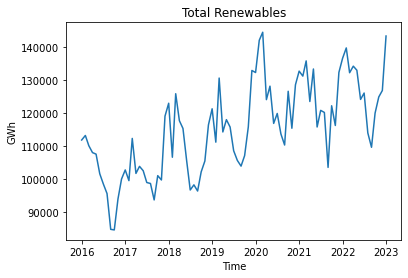

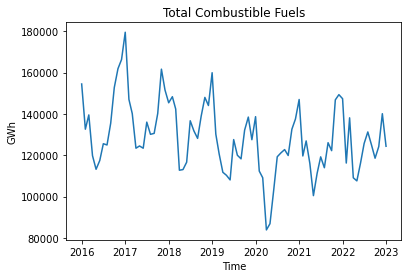

In [34]:
plt.figure()
plt.plot(new_df['Time'], new_df['Total Renewables (Geo, Solar, Wind, Other)'])
plt.xlabel('Time')
plt.ylabel('GWh')
plt.title('Total Renewables')

plt.figure()
plt.plot(new_df['Time'], new_df['Total Combustible Fuels'])
plt.xlabel('Time')
plt.ylabel('GWh')
plt.title('Total Combustible Fuels')

In [35]:
# Standartization ( just for my own understanding )

mean = new_df['Total Combustible Fuels'].mean()
std = new_df['Total Combustible Fuels'].std()

t = (new_df['Total Combustible Fuels'] - mean) / std

(array([ 2.,  2.,  8., 19., 20., 16., 10.,  4.,  3.,  1.]),
 array([-2.65084829, -2.08726519, -1.52368209, -0.96009899, -0.39651589,
         0.16706721,  0.73065031,  1.29423341,  1.85781651,  2.42139961,
         2.98498271]),
 <BarContainer object of 10 artists>)

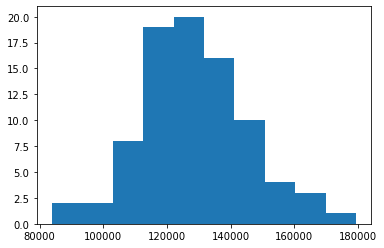

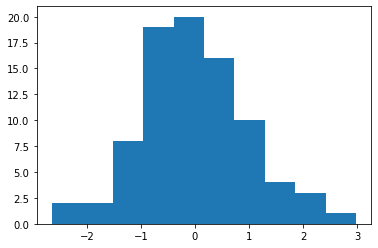

In [36]:
plt.figure()
plt.hist(new_df['Total Combustible Fuels'],bins=10)

plt.figure()
plt.hist(t,bins=10)

plt.figure()
plt.plot(new_df['Time'],t)
plt.xlabel('Time')
plt.ylabel('GWh / standartization')
plt.title('Standartization for Total Combustible Fuels')

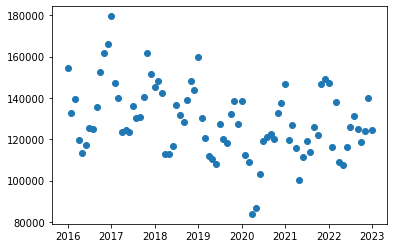

In [37]:
plt.scatter(new_df['Time'], new_df['Total Combustible Fuels'])

In [34]:
price = pd.read_csv('price.txt',delimiter=',')

In [35]:
price.head()

,Country,ISO3 Code,Date,Price(EUR/MWhe)
0,Austria,AUT,2015-01-01,31.68
1,Austria,AUT,2015-02-01,36.69
2,Austria,AUT,2015-03-01,31.30
3,Austria,AUT,2015-04-01,29.78
4,Austria,AUT,2015-05-01,25.33


In [36]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          2685 non-null   object 
 1   ISO3 Code        2685 non-null   object 
 2   Date             2685 non-null   object 
 3   Price(EUR/MWhe)  2685 non-null   float64
dtypes: float64(1), object(3)
memory usage: 84.0+ KB


In [37]:
price.Date = pd.to_datetime(price.Date)

In [38]:
price_eu = price.groupby('Date',as_index=False)['Price(EUR/MWhe)'].agg('mean')
price_eu['Price(EUR/GWh)'] = price_eu['Price(EUR/MWhe)']/1000
price_eu

,Date,Price(EUR/MWhe),Price(EUR/GWh)
0,2015-01-01,39.409200,0.039409
1,2015-02-01,41.030000,0.041030
2,2015-03-01,36.713600,0.036714
3,2015-04-01,35.725200,0.035725
4,2015-05-01,32.623200,0.032623
...,...,...,...
94,2022-11-01,190.605556,0.190606
95,2022-12-01,242.478519,0.242479
96,2023-01-01,125.555556,0.125556
97,2023-02-01,132.161786,0.132162


In [39]:
ur = pd.read_csv('unemployment rate.txt',delimiter=',')
ur.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,EU27_2020,HUR,TOT,PC_LF,M,2005-01,9.8,NaN
1,EU27_2020,HUR,TOT,PC_LF,M,2005-02,9.8,NaN
2,EU27_2020,HUR,TOT,PC_LF,M,2005-03,9.8,NaN
3,EU27_2020,HUR,TOT,PC_LF,M,2005-04,9.8,NaN
4,EU27_2020,HUR,TOT,PC_LF,M,2005-05,9.8,NaN


In [40]:
ur.TIME = pd.to_datetime(ur.TIME)

In [41]:
ur.rename({'Value':'UNMPR'},axis=1,inplace=True)

In [42]:
ur.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,UNMPR,Flag Codes
0,EU27_2020,HUR,TOT,PC_LF,M,2005-01-01,9.8,NaN
1,EU27_2020,HUR,TOT,PC_LF,M,2005-02-01,9.8,NaN
2,EU27_2020,HUR,TOT,PC_LF,M,2005-03-01,9.8,NaN
3,EU27_2020,HUR,TOT,PC_LF,M,2005-04-01,9.8,NaN
4,EU27_2020,HUR,TOT,PC_LF,M,2005-05-01,9.8,NaN


In [43]:
res = new_df[['Time','Geothermal','Solar','Wind','Other Renewables','Hydro','Combustible Renewables',
             'Coal, Peat and Manufactured Gases','Natural Gas','Oil and Petroleum Products',
             'Other Combustible Non-Renewables']].merge(ur[['TIME','UNMPR']],left_on = 'Time',right_on = 'TIME',how='left').merge(price_eu[['Date','Price(EUR/GWh)']],left_on='Time',right_on='Date',how='left')
res.drop(['TIME','Date'],axis=1,inplace=True)
res.head()

,Time,Geothermal,Solar,Wind,Other Renewables,Hydro,Combustible Renewables,"Coal, Peat and Manufactured Gases",Natural Gas,Oil and Petroleum Products,Other Combustible Non-Renewables,UNMPR,Price(EUR/GWh)
0,2016-01-01,1326.789,3351.967,35628.395,41.2,55023.687,16494.803,70313.116,59978.891,5455.079,2205.095,9.7,0.037164
1,2016-02-01,1256.233,4901.266,36277.080,41.2,55934.777,14830.339,60901.101,50334.148,4437.139,2066.531,9.6,0.027102
2,2016-03-01,1354.394,8047.000,27362.268,41.2,57546.386,15801.635,63693.955,53420.475,4432.972,2127.367,9.5,0.027581
3,2016-04-01,1282.061,11269.077,24661.307,41.2,56949.051,13866.405,53587.305,46547.237,3778.374,1991.104,9.4,0.027452
4,2016-05-01,1285.947,13493.892,23264.017,41.2,55841.288,13681.785,50761.393,42774.509,3859.860,2094.338,9.4,0.027448


In [44]:
#res.to_excel("C:/Users/User/Desktop/Danya's folder/Kursova/full_data.xlsx")